In [1]:
import tensorflow as tf
import os

In [2]:
os.path.join('data', 'bald')
os.listdir('data')

['bald', 'notbald']

In [3]:
# Remove dodgy images
import cv2
import imghdr
from matplotlib import pyplot as plt

In [4]:
data_dir = 'data'

In [5]:
image_exts = ['jpeg','jpg','bmp','png']

In [6]:
img = cv2.imread(os.path.join('data','bald','images80.jpg'))
img.shape

(183, 275, 3)

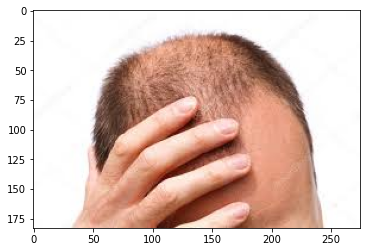

In [7]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [8]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data/notbald/asian-middle-aged-man-hair-260nw-474618421.jpg
Image not in ext list data/notbald/young-man-serious-hair-loss-260nw-509375926.jpg
Image not in ext list data/notbald/closeup-photo-my-mother-grey-260nw-1589115391.jpg
Image not in ext list data/notbald/top-view-bald-head-young-260nw-1904538124.jpg
Image not in ext list data/notbald/premature-gray-hair-asian-people-600w-1550405162.jpg
Image not in ext list data/notbald/woman-thin-hair-caused-by-600w-1889244310.jpg
Image not in ext list data/notbald/thin-hair-women-260nw-733412803.jpg
Image not in ext list data/notbald/close-hair-loss-thinning-scalp-600w-667791934.jpg
Image not in ext list data/notbald/woman-shows-her-grey-hair-260nw-1495901000.jpg
Image not in ext list data/notbald/hair-older-men-gray-mixed-260nw-1020922633.jpg
Image not in ext list data/notbald/close-on-damaged-skin-head-260nw-1257258130.jpg
Image not in ext list data/notbald/thinning-hair-scalp-issue-loss-600w-1540421720.jpg
Image not i

In [27]:
# Load data
tf.data.Dataset??

In [28]:
import numpy as np

In [29]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 292 files belonging to 2 classes.


In [30]:
data_iterator = data.as_numpy_iterator()

In [31]:
data_iterator

In [32]:
# Get another batch from the iterator
batch = data_iterator.next()

In [33]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [34]:
# Class 1 = Not Bald People
# Class 0 = Bald People 
batch[1]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int32)

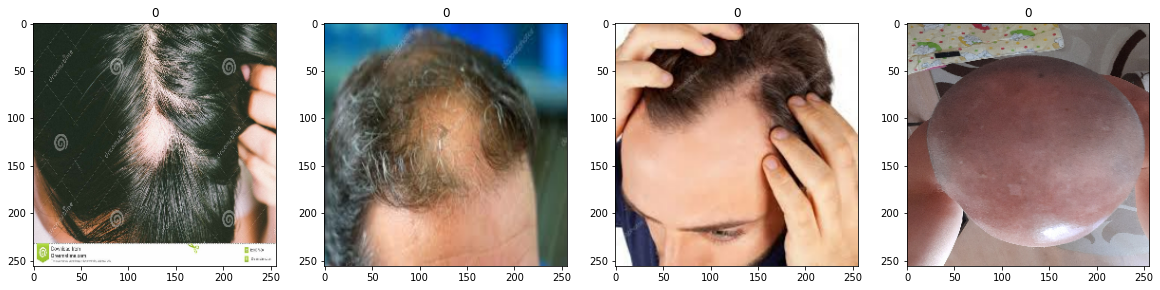

In [35]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [36]:
# Preprocess Data
# Scale data
data = data.map(lambda x, y: (x/225, y))

In [37]:
scaled_iterator = data.as_numpy_iterator()


In [38]:
scaled_iterator

In [39]:
batch = scaled_iterator.next()

In [40]:
batch[0].min()

0.0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


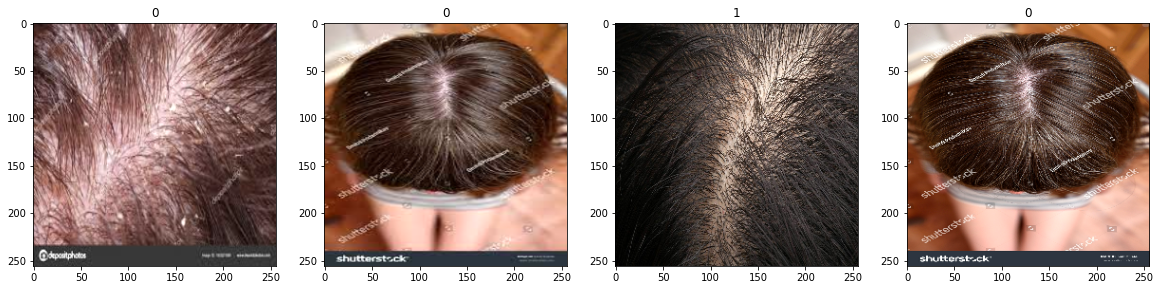

In [41]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [42]:
# Split data
len(data)

10

In [49]:
train_size = int(len(data)*.6)
val_size = int(len(data)*.1)+1
test_size = int(len(data)*.1)+1

In [50]:
train_size + val_size + test_size

10

In [51]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


In [52]:
# Build Deep learning model
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [54]:

model = Sequential()

In [55]:

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [56]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [57]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [58]:
# Train

logdir='logs'

In [59]:

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [60]:
hist = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
6/6 [==============================] - 5s 592ms/step - loss: 0.9551 - accuracy: 0.5833 - val_loss: 0.6219 - val_accuracy: 0.6406
Epoch 2/20
6/6 [==============================] - 4s 576ms/step - loss: 0.5762 - accuracy: 0.6927 - val_loss: 0.6361 - val_accuracy: 0.6094
Epoch 3/20
6/6 [==============================] - 4s 571ms/step - loss: 0.5433 - accuracy: 0.7083 - val_loss: 0.5240 - val_accuracy: 0.6719
Epoch 4/20
6/6 [==============================] - 4s 564ms/step - loss: 0.3869 - accuracy: 0.8281 - val_loss: 0.3810 - val_accuracy: 0.8281
Epoch 5/20
6/6 [==============================] - 4s 552ms/step - loss: 0.3576 - accuracy: 0.8385 - val_loss: 0.3438 - val_accuracy: 0.8438
Epoch 6/20
6/6 [==============================] - 4s 564ms/step - loss: 0.3066 - accuracy: 0.8750 - val_loss: 0.3048 - val_accuracy: 0.8750
Epoch 7/20
6/6 [==============================] - 4s 566ms/step - loss: 0.3131 - accuracy: 0.8594 - val_loss: 0.2861 - val_accuracy: 0.8750
Epoch 8/20
6/6 [====

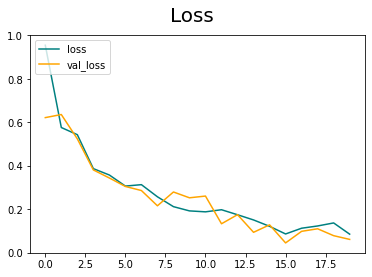

In [61]:
# Plot Performance

fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

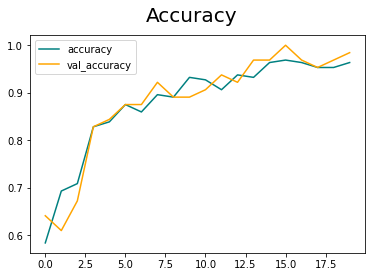

In [62]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [63]:
# Evaluate
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [64]:

pre = Precision()
re = Recall()
acc = BinaryAccuracy()


In [65]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 51ms/step


In [66]:

print(pre.result(), re.result(), acc.result())


tf.Tensor(0.9, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9722222, shape=(), dtype=float32)


In [67]:
#Test
import cv2

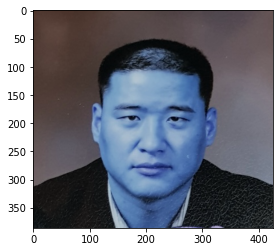

In [166]:

img = cv2.imread('leedad.jpeg')
plt.imshow(img)
plt.show()

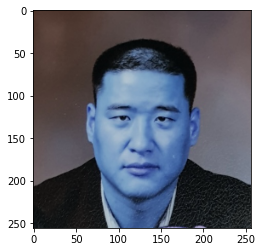

In [167]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [168]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 15ms/step


In [169]:
yhat

array([[0.9559485]], dtype=float32)

In [170]:
if yhat > 0.5: 
    print(f'Predicted class is Not Bald')
else:
    print(f'Predicted class is Bald')

Predicted class is Not Bald


In [103]:
# Save the model

from tensorflow.keras.models import load_model


In [131]:
model.save(os.path.join('models','finalhairimageclassifier.h5'))

In [132]:
new_model = load_model('models/finalhairimageclassifier.h5')

In [133]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 48ms/step


In [134]:
if yhatnew > 0.5: 
    print(f'Predicted class is Not Bald')
else:
    print(f'Predicted class is Bald')

Predicted class is Not Bald


In [135]:
yhatnew

array([[0.82436323]], dtype=float32)